In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Installing Libraries

In [108]:
!pip install pycountry-convert

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 203.4/203.4 kB 2.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
df_games_prices = pd.read_excel("../Data/list_1_processed.xlsx", index_col="Unnamed: 0")
df_games_prices += 1

Average difference between most expensive top 10 and cheapest top 10

In [3]:
lowest_prices_avg = df_games_prices.describe().loc["mean"].sort_values(ascending=False).tail(10).mean()
higest_prices_avg = df_games_prices.describe().loc["mean"].sort_values(ascending=True).tail(10).mean()
cheap_price_perc_dif = (lowest_prices_avg/higest_prices_avg) - 1
f"{cheap_price_perc_dif}%", f"{cheap_price_perc_dif*higest_prices_avg} USD"

('-0.48250381860589675%', '-14.833527134248946 USD')

Average difference between US steam games' prices and the worlds' average

In [5]:
us_games_price_avg = df_games_prices.describe().loc["mean"]["us"]
world_prices_avg = df_games_prices.describe().loc["mean"].mean()

us_price_perc_dif = (us_games_price_avg/world_prices_avg) - 1
f"{us_price_perc_dif:0.2f}%", f"{us_price_perc_dif*world_prices_avg:0.2f} USD"

('0.29%', '6.71 USD')

Average difference between Argentina steam games' prices and the worlds' average

In [6]:
arg_games_price_avg = df_games_prices.describe().loc["mean"]["ar"]
world_prices_avg = df_games_prices.describe().loc["mean"].mean()

us_price_perc_dif = (arg_games_price_avg/world_prices_avg) - 1
f"{us_price_perc_dif:0.2f}%", f"{us_price_perc_dif*world_prices_avg:0.2f} USD"

('-0.51%', '-11.85 USD')

Average difference between each country's price and worlds' average

<AxesSubplot:>

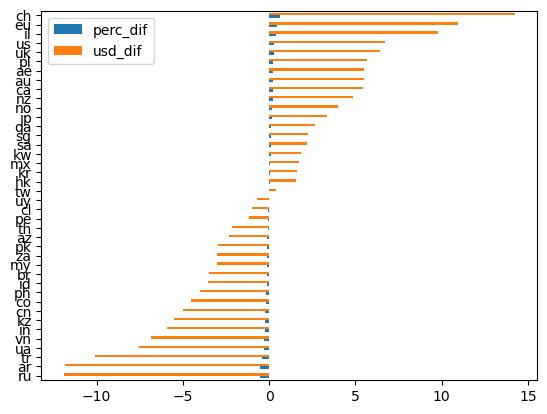

In [9]:
world_prices_avg = df_games_prices.describe().loc["mean"].mean()
world_prices_avg_perc_dif = (df_games_prices.describe().loc["mean"]/world_prices_avg) - 1
world_prices_avg_perc_dif.name = "perc_dif"
world_prices_avg_usd_dif = world_prices_avg_perc_dif * world_prices_avg
world_prices_avg_usd_dif.name = "usd_dif"

world_prices_df = pd.DataFrame([world_prices_avg_perc_dif, world_prices_avg_usd_dif]).T
world_prices_df.sort_values(by="usd_dif").plot(kind="barh")

In [8]:
import pycountry

def map_currency_to_iso(currency):
    for country in pycountry.countries:
        if hasattr(country, 'currency') and country.currency == currency:
            return country.alpha_2
    return None

[map_currency_to_iso(currency) for currency in world_prices_df.index.tolist()]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]